In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
data2 = pd.read_csv('./data/ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [7]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [10]:
def comCost(X,y,theta):
    y_pred = np.power((X*theta.T - y), 2)
    return np.sum(y_pred) / (2*len(X))

def gDesc(X,Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    params = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T) - Y
        for j in range(params):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = comCost(X,Y,theta)
    return theta, cost

data2.insert(0,'Ones', 1)

In [22]:
iters = 1000
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
Y2 = data2.iloc[:, cols-1:cols]

X2 = np.matrix(X2.values)
Y2 = np.matrix(Y2.values)
theta = np.matrix(np.array([0,0,0]))

g, cost = gDesc(X2,Y2,theta, 0.01, iters)
comCost(X2,Y2,g)

0.1307033696077189

Text(0.5, 1.0, 'Error vs Iterations')

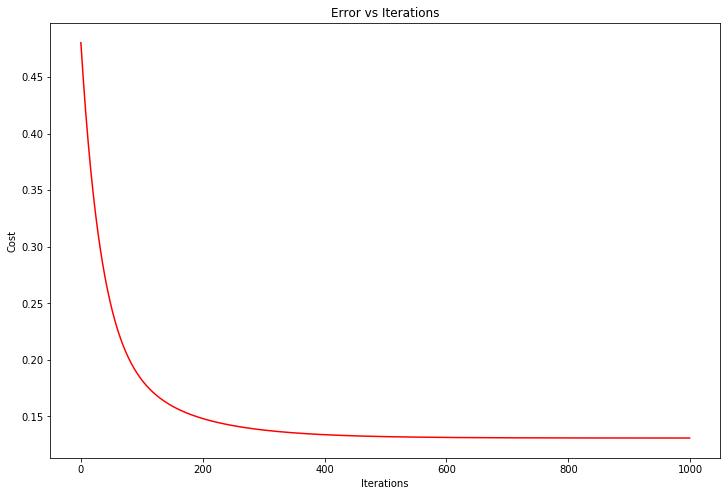

In [23]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

In [24]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X2, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)